In [1]:
import pandas as pd
import numpy as np

C:\Users\devan\AppData\Local\Temp\ipykernel_2044\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\devan\\Downloads\\train - train (1).csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['TravelAlone'] = np.where((df['SibSp'] + df['Parch']) > 0, 0 ,1).astype('uint8')

In [7]:
df1 = df.drop(['PassengerId','Name','Parch','SibSp','Ticket','Cabin'], axis = 1)

In [8]:
df1.isna().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
TravelAlone      0
dtype: int64

In [9]:
df1['Age'].fillna(df1['Age'].median(skipna = True), inplace = True)

C:\Users\devan\AppData\Local\Temp\ipykernel_2044\1858253311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].median(skipna = True), inplace = True)


In [10]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [11]:
df_Titanic = pd.get_dummies(df1, columns = ['Pclass', 'Embarked', 'Sex'], drop_first= True, dtype = int)

In [12]:
df_Titanic.head()

,Survived,Age,Fare,TravelAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [13]:
# df1['Embarked'].value_counts()

In [14]:
X = df_Titanic.drop(['Survived'] ,axis =1 )
y = df_Titanic['Survived']
X

,Age,Fare,TravelAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,22.0,7.2500,0,0,1,0,1,1
1,38.0,71.2833,0,0,0,0,0,0
2,26.0,7.9250,1,0,1,0,1,0
3,35.0,53.1000,0,0,0,0,1,0
4,35.0,8.0500,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1,1,0,0,1,1
887,19.0,30.0000,1,0,0,0,1,0
888,28.0,23.4500,0,0,1,0,1,0
889,26.0,30.0000,1,0,0,0,0,1


In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()

In [17]:
df_MM = trans_MM.fit_transform(X)
pd.DataFrame(df_MM)

,0,1,2,3,4,5,6,7
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,1.0,1.0,0.0,0.0,1.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,0.0,1.0,0.0
888,0.346569,0.045771,0.0,0.0,1.0,0.0,1.0,0.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# df_SS = trans_SS.fit_transform(X)
# pd.DataFrame(df_SS)

# check over or under fiting

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree  import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
X, y = make_classification( n_samples=9000,n_features=18, n_informative=4, n_redundant=12,random_state=4)
# pd.DataFrame(X)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
train_score , test_score = list(), list()

In [ ]:
values = [i for i in range(1,21)]

In [ ]:
for i in values:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train, y_train)
    
    train_pred = dtc.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    
    test_pred = dtc.predict(X_test)
    test_acc = accuracy_score(y_test , test_pred)
    
    train_score.append(train_acc)
    test_score.append(test_acc)

    print('>%d , train: %.3f , tets: %.3f' %(i , train_acc, test_acc))
    
    

In [ ]:
plt.plot(values, train_score , '-o' , label = 'Train')
plt.plot(values, test_score , '-o' , label = 'Test')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'criterion': ['gini' , 'entropy'], 
              'max_depth':[2,3,6,10,20],
               'min_samples_split': [5,10,20,50,100]}

cv = GridSearchCV(DecisionTreeClassifier() , param_grid , cv = 3 , n_jobs=-1 , scoring='accuracy')
cv.fit(X_train , y_train)

In [ ]:
best_model = cv.best_estimator_

In [ ]:
print(accuracy_score(y_train , best_model.predict(X_train)))
print(accuracy_score(y_test ,best_model.predict(X_test)))


# Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing 

In [ ]:
# !pip install statsmodels


In [ ]:
housing = fetch_california_housing()

In [ ]:
hou_df = pd.DataFrame(data = housing.data , columns = housing.feature_names)

In [ ]:
hou_df.head()

In [ ]:
hou_df['HousePrice'] = housing.target

In [ ]:
hou_df.describe()

In [ ]:
hou_df.isna().sum()

# pair plot - to see relationship of depenent variable with all independent variables

In [ ]:
# sns.pairplot(hou_df, height=1)
# plt.suptitle('Pair Plot of Features against House Price', y=1.02)
# plt.show()

# GeoGraphic distribution of datapoints based on longitude and latitude

it shows how house price and population density vary across different locations

In [ ]:
hou_df.plot(
    kind = "scatter",
    x = "Longitude",
    y = "Latitude",
    alpha = 0.5,
    s = hou_df['Population']/100,
    label = "Population",
    c = "HousePrice",
    cmap ="jet",
    colorbar = True, 
    figsize = (10,8)
)
plt.show()

# multi colinearity using variance inflation factor(VIF)

In [ ]:
corr = hou_df.corr()
plt.figure(figsize = (10,8))

sns.heatmap(corr , annot = True, cmap = 'coolwarm', fmt = ".2f" , linewidth = 0.5)

In [ ]:
corr["HousePrice"].abs().sort_values(ascending = False)

In [ ]:
Medinc = hou_df['MedInc']
houseprice = hou_df['HousePrice']

plt.figure(figsize = (10,8))
plt.scatter(Medinc , houseprice ,alpha = 0.5 , color = 'blue')
plt.title('MedInc vs. HousePrice')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid (True)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Interpretation of VIF Values:

VIF = 1: No multicollinearity.  
VIF between 1 and 5: Moderate multicollinearity (may not be a concern)  
VIF greater than 5: High multicollinearity (should be addressed).

the high VIF scores shows multiple linearity  issues with other fearures, so we need to address them so we increase stability and interpritability of model

# error(HousePrice should not be in VIF )

In [ ]:
hou_df_vif = hou_df.drop(columns = ["HousePrice"], axis=1)
# print(hou_df_vif)
hou_df_vif = hou_df.apply(pd.to_numeric, errors='coerce')
vif_data = pd.DataFrame()
vif_data['Feature'] = hou_df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(hou_df_vif.values, i) for i in range(len(hou_df_vif.columns))]
print(vif_data)


In [ ]:
hou_df = hou_df.drop(['Latitude','Longitude'], axis = 1)

In [ ]:
hou_df.columns

In [ ]:
hou_df

In [ ]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population','AveOccup']
hou_df[cols_to_convert] = hou_df[cols_to_convert].apply(pd.to_numeric , errors = 'coerce')
hou_df['HousePrice'] = pd.to_numeric(hou_df['HousePrice'], errors = 'coerce')

# OLS(Ordinary Least Square)

In [ ]:
# drop HousePrice and then add constant column
X = sm.add_constant(hou_df.drop('HousePrice', axis = 1))
y = hou_df['HousePrice']
model = sm.OLS(y,X).fit()

In [ ]:
# Residual Analysis to validate Linear regression assumptions

In [ ]:
residuals = model.resid
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde = True)
plt.title('Residual Distribution')


plt.subplot(1,2,2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color = 'red', linestyle = '--')
plt.title('residual vs. predicted')
plt.ylabel
plt.show()

print(' model coefficient:\n', model.params)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
predictions = model.predict(X)

In [ ]:
print('R square score:', r2_score(y, predictions))
print('MSE:', mean_squared_error(y, predictions))

# box plot

In [ ]:
def plots(df):
    fig , axes = plt.subplots(1, len(df.columns), figsize = (20,10))

    for i, column_name in  enumerate(df.columns):
        df.boxplot(column = column_name, ax = axes[i])
        axes[i].set_title(column_name)

    plt.show()
    
plots(hou_df)

In [ ]:
def remove_outliers(df):
    df_no_outliers = df.copy()

    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)

        IQR = Q3 - Q1
    
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 + 1.5* IQR
    
        df_no_outliers[column_name] = df_no_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound
                                                                       else upper_bound if x > upper_bound else x)
    return df_no_outliers

    
df_new = remove_outliers(hou_df)


In [ ]:
df_new

In [ ]:
plots(df_new)

In [ ]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population','AveOccup']
df_new[cols_to_convert] = df_new[cols_to_convert].apply(pd.to_numeric, errors = 'coerce')
df_new['HousePrice'] = pd.to_numeric(df_new['HousePrice'], errors = 'coerce')

In [ ]:
X = sm.add_constant(df_new.drop('HousePrice', axis = 1))
y = df_new['HousePrice']

model = sm.OLS(y,X).fit()

In [ ]:
residuals = model.resid

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde = True) # kernal density algorithm
plt.title('Residual Distribution')


plt.subplot(1,2,2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color = 'red', linestyle = '--')
plt.title('residual vs. predicted')
plt.ylabel
plt.show()

print(' model coefficient:\n', model.params)

In [ ]:
predictions = model.predict(X)

In [ ]:
print('R square score:', r2_score(y, predictions))
print('MSE:', mean_squared_error(y, predictions))

till here, we have just make data to be ready to grt fitted in the model

# K-nearest neighbour

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df = pd.read_csv("C:\\Users\\devan\\Downloads\\archive (19)\\Social_Network_Ads.csv")

In [ ]:
df.head()

In [ ]:
df.info()
df.columns

In [ ]:
df['Purchased'].value_counts()

In [ ]:
gender = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df,gender], axis = 1)

In [ ]:
df

In [ ]:
df.drop(['Gender'], inplace = True, axis = 1)

In [ ]:
X = df[['Age', 'EstimatedSalary', 'Male']]
y = df['Purchased']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

In [ ]:
scaled_features = scaler.transform(X)
scaled_features

In [ ]:

df_feat = pd.DataFrame(scaled_features, columns = X.columns)
df_feat.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
print(classification_report(y_test, pred))

# Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df = pd.read_csv("C:\\Users\\devan\\Downloads\\archive (20)\\balance-scale.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [ ]:
X = df.drop('Class', axis = 1)
y = df[['Class']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini', random_state=42, min_samples_leaf=5, max_depth=3)

In [ ]:
DT.fit(X_train, y_train)

In [ ]:
y_pred = DT.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
target = list(df['Class'].unique())
fea_names = list(X.columns)

In [ ]:
from sklearn.tree import export_text
r = export_text(DT, feature_names=fea_names)
print(r)

In [ ]:
from sklearn import tree

In [ ]:
tree.plot_tree(DT, fontsize=6)

# rendom forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("C:\\Users\\devan\\Downloads\\archive (21)\\petrol_consumption.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
X = df.drop("Petrol_Consumption", axis = 1)

In [ ]:
y = df[["Petrol_Consumption"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
RF = RandomForestRegressor(n_estimators=20, random_state=0)
RF.fit(X_train, y_train)

In [ ]:
y_pred = RF.predict(X_test)

In [ ]:
print('test MAE: ', mean_absolute_error(y_test, y_pred))
print('test RMSE: ', np.sqrt(mean_absolute_error(y_test, y_pred)))
print('test R2: ', r2_score(y_test, y_pred))

In [ ]:
X_train_pred = RF.predict(X_train)

In [ ]:
print('Train MAE: ', mean_absolute_error(y_train, X_train_pred))
print('Train RMSE: ', np.sqrt(mean_absolute_error(y_train, X_train_pred)))
print('Train R2: ', r2_score(y_train, X_train_pred))

# Boruta technique for feature selection with random forest(Error and left)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.metrics import accuracy_score

In [ ]:
# ! pip install boruta

In [ ]:
# URL = "https://raw.githubusercontent.com/Aditya1001001/English-Premier-League/master/pos_modellling_data.csv"

In [ ]:
df = pd.read_csv("C:\\Users\\devan\\Downloads\\archive (19)\\Social_Network_Ads.csv")
df.head()

In [ ]:
df.info()

In [ ]:
gender = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df,gender], axis = 1)

In [ ]:
df.drop('Gender', axis = 1)

In [ ]:
# X = df.drop('Purchased', axis = 1)
# y = df[['Purchased']]

In [ ]:
X = df[['Age', 'EstimatedSalary', 'Male']]
y = df['Purchased']

In [ ]:
sc = StandardScaler()
sc.fit(X)

In [ ]:
scaled_features = scaler.transform(X)
scaled_features

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(scaled_features,y, test_size=0.2, random_state=42)

In [ ]:
RF = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
RF.fit(X_train,y_train)
accuracy_score(y_test, RF.predict(X_test))

In [ ]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
# boruta_selector.fit(np.array(X_train), np.array(y_train))

# SVC

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

C:\Users\devan\AppData\Local\Temp\ipykernel_8304\1790743522.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\devan\\Downloads\\archive (22)\\heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [7]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df[['Sex']])

encoder1 = OneHotEncoder(sparse_output=False)
df1 = encoder1.fit_transform(df[['ChestPainType']])
f1 = encoder1.get_feature_names_out(['ChestPainType'])
df1 = pd.DataFrame(df1, columns=f1)
# df1

C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
df2 = encoder1.fit_transform(df[['RestingECG']])
f1 = encoder1.get_feature_names_out(['RestingECG'])
df2 = pd.DataFrame(df2, columns=f1)


In [9]:
df3 = encoder1.fit_transform(df[['ExerciseAngina']])
f1 = encoder1.get_feature_names_out(['ExerciseAngina'])
df3 = pd.DataFrame(df3, columns=f1)


In [10]:
df4 = encoder1.fit_transform(df[['ST_Slope']])
f1 = encoder1.get_feature_names_out(['ST_Slope'])
df4= pd.DataFrame(df4, columns=f1)


In [11]:
df = pd.concat([df,df1,df2,df3,df4], axis=1)

In [12]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,ATA,140,289,0,Normal,172,N,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,ATA,130,283,0,ST,98,N,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,1,NAP,150,195,0,Normal,122,N,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,1,ASY,144,193,1,Normal,141,N,3.4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,0,ATA,130,236,0,LVH,174,N,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int32  
 2   ChestPainType      918 non-null    object 
 3   RestingBP          918 non-null    int64  
 4   Cholesterol        918 non-null    int64  
 5   FastingBS          918 non-null    int64  
 6   RestingECG         918 non-null    object 
 7   MaxHR              918 non-null    int64  
 8   ExerciseAngina     918 non-null    object 
 9   Oldpeak            918 non-null    float64
 10  ST_Slope           918 non-null    object 
 11  HeartDisease       918 non-null    int64  
 12  ChestPainType_ASY  918 non-null    float64
 13  ChestPainType_ATA  918 non-null    float64
 14  ChestPainType_NAP  918 non-null    float64
 15  ChestPainType_TA   918 non-null    float64
 16  RestingECG_LVH     918 non

In [14]:
df.drop(columns =['ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope'],axis=1, inplace=True)

In [15]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Age-Cholesterol plot')

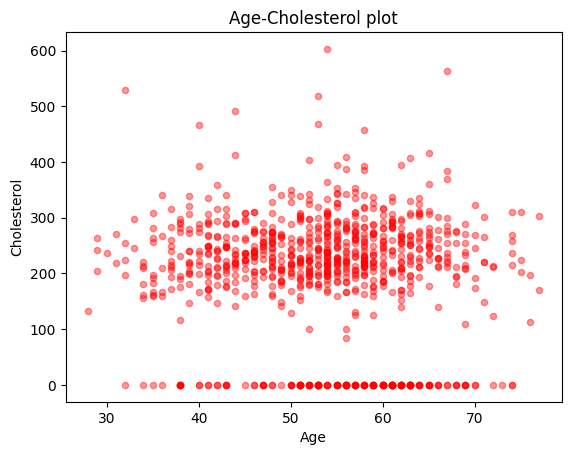

In [16]:
df.plot(kind='scatter',x='Age', y='Cholesterol',alpha=0.4, color='red')
plt.xlabel('Age' )
plt.ylabel('Cholesterol' )
plt.title('Age-Cholesterol plot')

In [17]:
X = df.drop('HeartDisease', axis =1)
y=df['HeartDisease']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [19]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svm = SVC()
params = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma' : ['scale', 'auto'],
    'degree': [1,2,3,4]
}
GS = GridSearchCV(svm, params, n_jobs=-1,cv=5)
GS.fit(X_train, y_train)

In [ ]:
print(GS.best_params_)

In [ ]:
accuracy = GS.best_score_

In [ ]:
y_pred = GS.prdict(X_test)